# Scientific Computing

[[Instructor: Lei Zhang]](http://ins.sjtu.edu.cn/people/lzhang)  [[CANVAS]](https://oc.sjtu.edu.cn/courses/27589)

See the end of this note and/or [CANVAS](https://oc.sjtu.edu.cn/courses/27589) for administrative details.

## Textbook:
* [[Numerical Mathematics]](https://link.springer.com/book/10.1007%2Fb98885) by A. Quarteroni, R. Sacco, and F. Saleri

## Other References:
* 数值分析, 张平文，李铁军编著，北京大学出版社
* 数值分析基础, 关治，陆金甫编著，高等教育出版社。
* 数值分析(第七版 影印版)，Burden, Faires, 高等教育出版社。
* Iterative methods for sparse linear systems, Saad, SIAM, 2003.
* Numerical Optimization, Nocedal, Wright, Springer, 2006
* A First Course in the Numerical Analysis of Differential Equations, Iserles, Cambridge, 2008


# What is the course about?

- Alternative names:
    - Numerical analysis
    - Numerical methods
    - Numerical computation
    - Technical computing
    - Scientific computing
    - Computational science and engineering

[[Numerical analysis course with Julia ]](https://discourse.julialang.org/t/numerical-analysis-course-with-julia/34215)

# A Crash-Course

Goal: understand the main principles behind *numerical* computations (as opposed to *symbolic* computations)
* principles of numerical mathematics
* direct methods and iterative methods for linear sytems
* approximation of eigenvlaues and eigenvectors
* nonlinear equations, nonlinear systems and numerical optimization
* polynomial interpolation, numerical integration, and approximation theory
* solving (ordinary ) differential equations numerically

Next term: numerical methods for (partial) differential equations

In [1]:
using PyCall 
YouTubeVideo = pyimport("IPython.lib.display").YouTubeVideo
Video = pyimport("IPython.display").Video;

# Principles of Numerical Mathematics

* well-posedness and condition number of a problem
* stability of numerical methods
* a priori and a posteriori analysis
* errors in computational models
* floating point arithmetic (underpins everything)

*[[The World's Fastest linear solver]](http://www.polyu.edu.hk/ama/pdf/talk_polyu20.pdf)
<img src="http://pi.math.cornell.edu/~web6140/chop.png" style="width: 400px;"/>


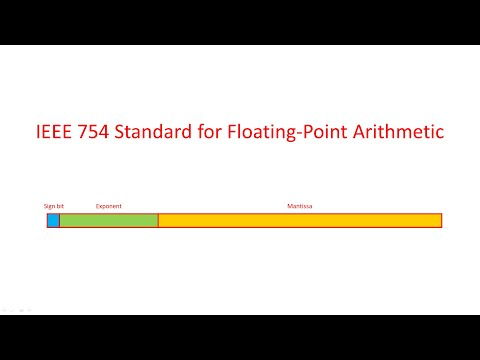

In [2]:
YouTubeVideo("RuKkePyo9zk")

In [3]:
using Printf, LinearAlgebra, Plots

In [4]:
function fdtest(F::Function, dF::Function, x; verbose=true)
   errors = Float64[]
   E = F(x)
   dE = dF(x)
   # loop through finite-difference step-lengths
   @printf("---------|----------- \n")
   @printf("    h    | error \n")
   @printf("---------|----------- \n")
   h = zeros(Float64, 16)
   err = zeros(Float64, 16)
   for p = 1:16
      h[p] = 0.1^p
      dEh = copy(dE)
      for n = 1:length(dE)
         x[n] += h[p]
         dEh[n] = (F(x) - E)[1] / h[p]
         x[n] -= h[p]
      end
      push!(errors, norm.(dE .- dEh, Inf)...)
      @printf(" %1.1e | %4.2e  \n", h[p], errors[end])
      #err[p] = errors[end]
   end
   @printf("---------|----------- \n")
    
   display(plot(h, errors, lw=2, m=:o, ms=8, xaxis=:log, yaxis=:log))
 
   if minimum(errors) <= 1e-3 * maximum(errors)
      println("passed")
      return true
   else
      warn("""It seems the finite-difference test has failed, which indicates
      that there is an inconsistency between the function and gradient
      evaluation. Please double-check this manually / visually. (It is
      also possible that the function being tested is poorly scaled.)""")
      return false
   end
    
end


fdtest (generic function with 1 method)

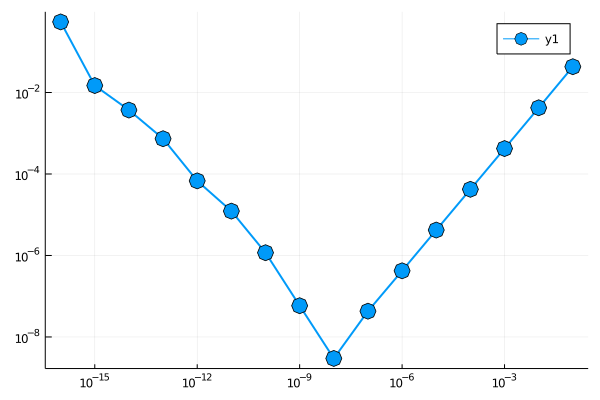

---------|----------- 
    h    | error 
---------|----------- 
 1.0e-01 | 4.29e-02  
 1.0e-02 | 4.22e-03  
 1.0e-03 | 4.21e-04  
 1.0e-04 | 4.21e-05  
 1.0e-05 | 4.21e-06  
 1.0e-06 | 4.21e-07  
 1.0e-07 | 4.29e-08  
 1.0e-08 | 2.97e-09  
 1.0e-09 | 5.85e-08  
 1.0e-10 | 1.17e-06  
 1.0e-11 | 1.23e-05  
 1.0e-12 | 6.78e-05  
 1.0e-13 | 7.34e-04  
 1.0e-14 | 3.71e-03  
 1.0e-15 | 1.48e-02  
 1.0e-16 | 5.40e-01  
---------|----------- 
passed


true

In [5]:
f(x) = sin.(x)
g(x) = cos.(x)
x = [1.0]
fdtest(f, g, x)

## Top Ten Algorithms

![test](wordcloud.png)


 * Newton and quasi-Newton methods,
 * Matrix factorizations (LU, Cholesky, QR)
 * SVD, QR and QZ algorithms,
 * Monte-Carlo methods,
 * Fast Fourier transform,
 * Krylov subspace methods,
 * JPEG,
 * PageRank,
 * Simplex method, and
 * Kalman filter. 

Honorable mentions: Bootstraping methods, fast multipole method, and quicksort. 

See more at [[Top Ten Algorithms from the 20th Century ]](http://pi.math.cornell.edu/~web6140/)

# Ten Digit algorithms 


### pi_via_agm.m  
Compute pi by arithmetic-geometric mean iteration               
L. N. Trefethen 7/03            
L. Zhang convert to Julia 10/20

The AGM iteration for computing elliptic integrals goes back to Gauss.  In 1976 Brent (J. ACM) and independently Salamin (Math. Comp.) published AGM algorithms converging quadratically to pi. This code implements a variant due to Borwein and Borwein (SIAM Review 1984) given as Algorithm 2.1 in their 1987 book "Pi and the AGM".  The results are more dramatic in extended precision!  

```julia
let 
    y = sqrt(sqrt(2));  
    x = (y+1/y)/2;  
    p = 2+sqrt(2);  
    for i = 1:10    
        @printf("%21.20e  \n", p)
        p = p*(1+x)/(1+y);    
        s = sqrt(x);    
        y = (y*s+1/s)/(1+y);    
        x = (s+1/s)/2;  
    end
end
```
[[arithmetic–geometric mean]](https://en.wikipedia.org/wiki/Arithmetic%E2%80%93geometric_mean)

[[ten digit algorithms]](https://people.maths.ox.ac.uk/trefethen/tda05.pdf)


In [15]:
let 
    y = sqrt(sqrt(2));  
    x = (y+1/y)/2;  
    p = 2+sqrt(2);  
    for i = 1:10    
        @printf("%21.20e  \n", p)
        p = p*(1+x)/(1+y);    
        s = sqrt(x);    
        y = (y*s+1/s)/(1+y);    
        x = (s+1/s)/2;  
    end
end


3.41421356237309492343e+00  
3.14260675394162269924e+00  
3.14159266096604383733e+00  
3.14159265358979311600e+00  
3.14159265358979311600e+00  
3.14159265358979311600e+00  
3.14159265358979311600e+00  
3.14159265358979311600e+00  
3.14159265358979311600e+00  
3.14159265358979311600e+00  


# Solving Linear System $Ax = b$ 

## Direct Method
* stability analysis
* Gauss Eliminination, LU factorization and other facorizations
* banded, block, and sparse systems
* accuracy, condition number $\kappa(A)$, etc

[[Gauss Elimination with Julia]](http://web.mit.edu/18.06/www/Spring17/Gaussian-elimination.pdf)

## Iterative Method
* convergence
* linear methods (Gauss-Seidel, Jacobi, SOR...)
* stationary & nonstationary methods, Richardson, gradient, conjugate gradient, preconditioning
* Krylov subspace iterations, Lanczos
* stopping criteria

*[[九章算术中的高斯消去法]](https://highscope.ch.ntu.edu.tw/wordpress/?p=14177) 

*[[中国古代的机械化算法]](https://www.bilibili.com/video/av456904600/)



# Approximate Eigenvalue and Eigenvectors $Ax = \lambda x$

* properties of eigenvalues
* stability & conditioning analysis
* power method 
* QR iteration, Householder & Givens tranforms, shifting
* methods for symmetric matrices, Jacobi, Sturm sequences, Lanczos




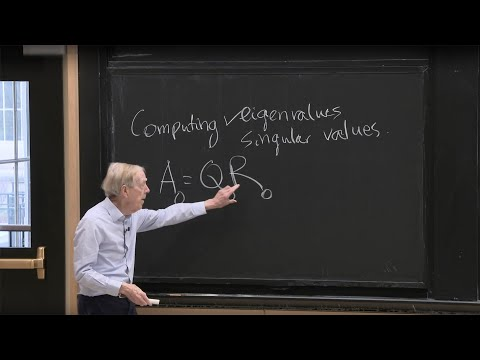

In [6]:
YouTubeVideo("d32WV1rKoVk")

# Nonlinear Equations, Nonlinear Systems, and Numerical Optimization

## $f(x) = 0$

* root finding

[[Root finding functions for Julia]](https://github.com/JuliaMath/Roots.jl)

## $F(x) = 0$ 

* Newton, quasi-Newton, etc.

## $\min_{x\in \Omega} f(x)$ 

* direct search
* line search
* descent method, Newton like method, etc.
* constraints

[[Newton Raphson in Julia]](https://mmas.github.io/newton-julia)


# Polynomial Interpolation, Numerical Integration and Approximation Theory

* Interpolation error & stability
* Quadrature formulae & automatic integration
* Orthogonal polynomials, least squares, Fourier transform
* Neural network approximation



# Numerical Solution of Ordinary Differential Equations

* One-step methods, stability & convergence analysis
* Multistep methods, difference equations, stability & convergence analysis
* Predictor-corrector methods
* Runge-Kutta methods
* Stiff Problems

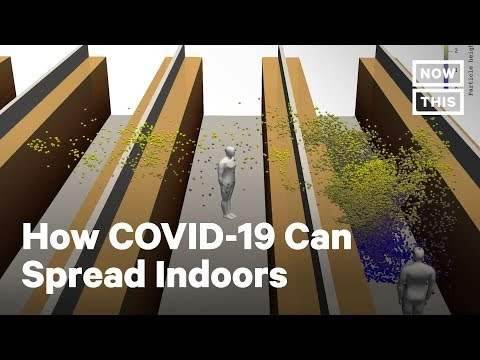

In [8]:
YouTubeVideo("dbBmSBA7Kyw")    # spread of covid-19


Molecular Dynamics: (or more general Hamiltonian dynamics)
$$ 
    m_n \ddot{r_n} = - \nabla E(r_1, \dots, r_N)
$$

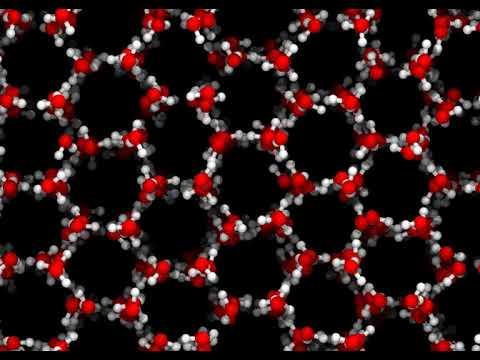

In [9]:
YouTubeVideo("3xaZwbKyYdM")    # ice melting

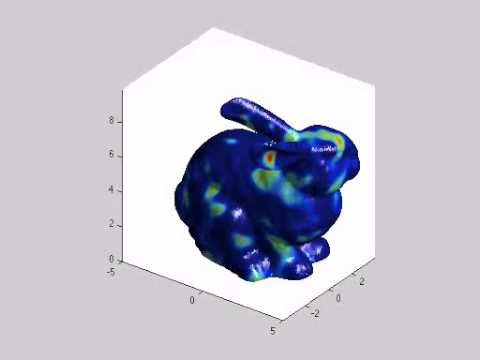